<a href="https://colab.research.google.com/github/Vinicius-Ikehara/Projetos-Machine-Learning/blob/main/Salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTANDO O DATASET**

In [ ]:
path = "/content/drive/MyDrive/Projetos Machine Learning/Projeto 1 - Previsão de Salários"
 
df = pd.read_csv(path + '/Salary.csv')

# Quem quiser baixar esse dataset o link é este:
# https://www.kaggle.com/datasets/rsadiq/salary

In [ ]:
df.shape

(35, 2)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
X = df.iloc[:, :-1].values    # Nossa Característica => Anos de Experiência (Variável Independente) 
y = df.iloc[:, -1].values     # Objetivo de predição => Salário (Variável Dependente)

print('X shape: ', X.shape, ' and Y shape: ', y.shape)

X shape:  (35, 1)  and Y shape:  (35,)


In [ ]:
import plotly.express as px

corr = df.corr() #Correlação entre os dados do dataframe
fig = px.imshow(corr)
fig.show() # Pela figura podemos ver que os dados possuem uma alta correlação

In [ ]:
X # Valores de X então são o número de anos de experiência

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
y # Valores de Y representam os valores do salário dos funcionários

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

**Importando a função train_test_split do Scikit-Learn**

In [ ]:
# Essa função divide o dataset em um conjunto de treinamento e um conjunto de testes
from sklearn.model_selection import train_test_split

# random_state => seed valor da seed usado por um gerador de números aleatórios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Modelo de Regressão básico do Scikit-Learn
model.fit(X_train, y_train) # Esse modelo será treinado com os valores de X train e Y train

LinearRegression()

In [ ]:
# O modelo agora vai pegar os valores dos anos de trabalho do X test
print(X_test)
# E vai utiliza-los para tentar prever qual será o seu salário, já que o modelo já foi treinado para isso
predicao = model.predict(X_test)
predicao

[[10.5]
 [ 6.8]
 [ 5.1]
 [10.3]
 [ 7.9]
 [ 4.9]
 [ 3.9]
 [ 1.5]
 [ 4. ]
 [ 9.6]
 [ 9. ]]


array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

In [ ]:
y_test


array([121872,  91738,  66029, 122391, 101302,  67938,  63218,  37731,
        55794, 112635, 105582])

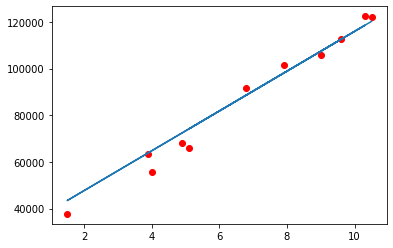

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, model.predict(X_test))

In [ ]:
X_train

array([[13.5],
       [12.3],
       [ 9.5],
       [11.2],
       [ 3.2],
       [ 4.1],
       [ 2.9],
       [ 5.3],
       [ 4.5],
       [11.5],
       [ 8.7],
       [ 1.3],
       [ 4. ],
       [ 3. ],
       [ 8.2],
       [ 2.2],
       [ 5.9],
       [ 7.1],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [12.9],
       [ 2. ],
       [ 1.1]])

In [ ]:
y_train

array([139465, 128765, 116969, 127345,  64445,  57081,  56642,  83088,
        61111, 126756, 109431,  46205,  56957,  60150, 113812,  39891,
        81363,  98273,  93940,  57189,  54445, 135675,  43525,  39343])

In [ ]:
import numpy as np

In [ ]:
erro = abs(predicao - y_test)
resultados = pd.DataFrame({'Valor da Predição':np.round(predicao), 'Salário Real':y_test, 'Erro':np.round(erro)})
resultados

,Valor da Predição,Salário Real,Erro
0,120198.0,121872,1674.0
1,88644.0,91738,3094.0
2,74147.0,66029,8118.0
3,118492.0,122391,3899.0
4,98025.0,101302,3277.0
5,72441.0,67938,4503.0
6,63913.0,63218,695.0
7,43446.0,37731,5715.0
8,64766.0,55794,8972.0
9,112523.0,112635,112.0


In [ ]:
from sklearn.metrics import mean_squared_error
import math

errors = math.sqrt(mean_squared_error(y_test, predicao))
print('Erro Quadrático médio (Quanto mais próximo do 0 melhor): ', errors)

Erro Quadrático médio (Quanto mais próximo do 0 melhor):  4685.185783311836
